# Red Neuronal Convolucional para la deteccion de numeros.
### Codificado por: Jorge Hernandez.

In [ ]:
#Importa la biblioteca de TensorFlow, para construir el modelo de red neuronal
import tensorflow as tf
# Importa la bibloteca de TensorFlow para el manejo de un conjunto de datos procesados para usar.
import tensorflow_datasets as tfds
# Importa la biblioteca numpy para realizar los calculos necesarios
import numpy as np
# Importa la función to_categorical, Esta función se utiliza para convertir un conjunto de etiquetas en formato numérico en una matriz de one-hot encoding
from tensorflow.keras.utils import to_categorical
# Importa a Matplotlib es una biblioteca ampliamente utilizada en Python para crear gráficos y visualizaciones.
import matplotlib.pyplot as plt
# Importa el data set de casi 70,000 imagenes etiquetas de numeros escritos a mano
from tensorflow.keras.datasets import mnist
# Importa el modelo para generar la red
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
# Importa la herramienta utilizar el decenso del gradiente como la herramienta de aprendizaje
from keras.optimizers import SGD
import pandas as pd
#Importa la libreria que permite utilizar la biblioteca que proporciona funciones relacionadas con la generación de números aleatorios.
import random
#Importa la libreria de Dropout
from keras.layers import Dropout
#Importa el módulo "metrics" de scikit-learn contiene varias funciones y métricas comúnmente utilizadas para evaluar la calidad y el rendimiento de los modelos de aprendizaje automático.
from sklearn  import metrics

In [ ]:
datos = mnist.load_data()
(X_entrenamiento,Y_entrenamiento),(X_pruebas,Y_pruebas) = datos

# ***Formato de las Imagenes***

Primero daremos formato a las imagenes, ya que, aunque todas las imagenes tienen el mismo tamaño, debemos de dar la forma adecuada para que los datos puedan ser ingresados a nuestra red, como usaremos una red de capa convulucional 2D, requeriremos 4 dimensiones que son:
1.   Numero total de datos
2.   Largo de la imagen
3.   Ancho de la imagen
4.   Numero de canales de color

Con la funcion **.reshape** cambia la forma o la dimension del arreglo o del tensor, mientras que con la forma **.shape** obtiene la forma o dimension del propio arreglo o tensor para las dimensiones de estas imagenes son de 28 x 28 y debido a que es en escala de grises solo tendra el valor de 1

In [ ]:
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0],28,28,1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0],28,28,1)

Ahora tomaremos un número e imprimiremos la imagen que se a guardado en el set de entrenamiento correspondiente a esa posicion para saber si hemos realizado la carga y particion de datos de manera correcta.

Text(0.5, 1.0, 'Valor: 1')

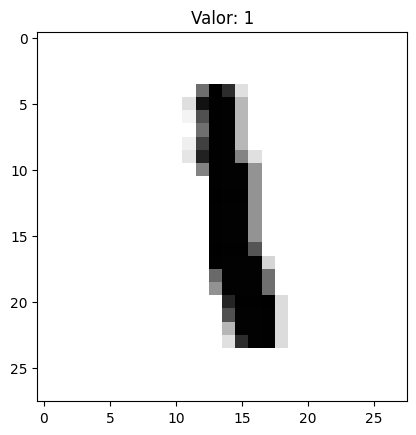

In [ ]:
num_ale = random.randint(1,20)
plt.imshow(X_entrenamiento[num_ale,:].reshape(28,28),cmap='gray_r')
plt.title('Valor: '+str(Y_entrenamiento[num_ale]))

La siguiente linea, permite realizar la tecnica de One hot encoding que es una técnica de procesamiento de datos utilizada en aprendizaje automático y análisis de datos para representar variables categóricas como vectores numéricos.

In [ ]:
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

Ya realizado los pasos anteriores, normalizaremos los datos que hemos recibido para poder asegurarnos que todos los datos tienen los mismos parametros, para ello, convertiremos dichos datos a tipo float luego dividiremos esos datos entre 255, esta operación se realiza para escalar los valores de píxeles de la escala original (0-255) a una escala normalizada (0-1)

In [ ]:
X_entrenamiento = X_entrenamiento.astype('float')/255
X_pruebas = X_pruebas.astype('float')/255

Ya con esto hecho, tomaremos una muestra de datos y la imprimiremos para asegurarnos que hasta este momento todos los datos han sido tratados correctamente.

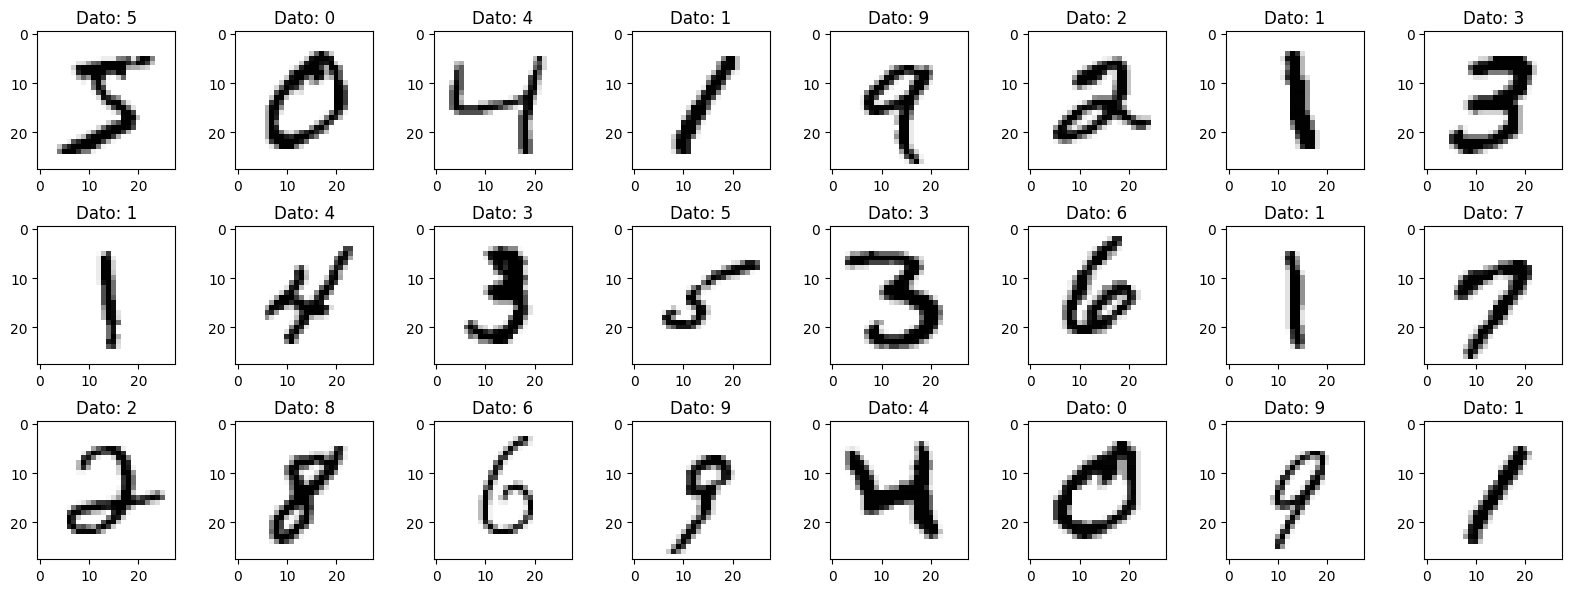

In [ ]:
n_columnas = 8
n_filas = 3
n_total = n_columnas*n_filas

fig1, axes1 = plt.subplots(ncols=n_columnas,nrows=n_filas,figsize=(2*n_columnas,2*n_filas))

for index in range(n_total):
  value = axes1[index//n_columnas,index%n_columnas]
  value.imshow(X_entrenamiento[index,:].reshape(28,28), cmap='gray_r')
  value.set_title('Dato: {}'.format(np.argmax(Y_entrenamiento[index])))

# "tight_layout" realiza el ajuste automatico entre los espacios de los elementos
plt.tight_layout()
plt.show()

# ***Seccion de Aumento de Datos***

El aumento de datos, es una técnica utilizada en el aprendizaje automático y la visión por computadora para aumentar la cantidad y la variedad de datos de entrenamiento disponibles.

El objetivo principal del aumento de datos es evitar el sobreajuste (overfitting) y mejorar la capacidad de generalización de los modelos de aprendizaje automático. Al generar nuevas muestras de datos a partir de las existentes, se introduce variabilidad y diversidad en el conjunto de entrenamiento, lo que ayuda al modelo a aprender características más robustas y a generalizar mejor a nuevas instancias de datos.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Aqui ingresamos algunos de los parametros que modificaremos en cada una de las imagenes y ejecutamos dicho codigo

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=35, #Especifica el rango de angulos en grados del cual se puede rotar la imagen
    width_shift_range=0.1, #Especifica el rango fraccionario (relativo al ancho de la imagen) dentro del cual se puede desplazar horizontalmente una imagen. Este representa un 10% con 0.1
    height_shift_range=0.1, # Especifica el rango fraccionario dentro del cual se puede desplzar verticalmente la imagen
    horizontal_flip=True, # Especifica si se debe aplicar un volteo horizontal de las imagenes
    shear_range = 15 #Especifica el rango de deformacion que distorcionara la imagen al cambiar la posicion relativa de los puntos
)

datagen.fit(X_entrenamiento)

Ahora, para apreciar las modificiaciones que realizamos a nuestro codigo volveremos a imprimir los datos como se observan cuando cargamos por primera vez, y tambien imprimiremos las imagenes con las modificaciones realizadas en el paso anterior.

Antes del Aumento de Datos:


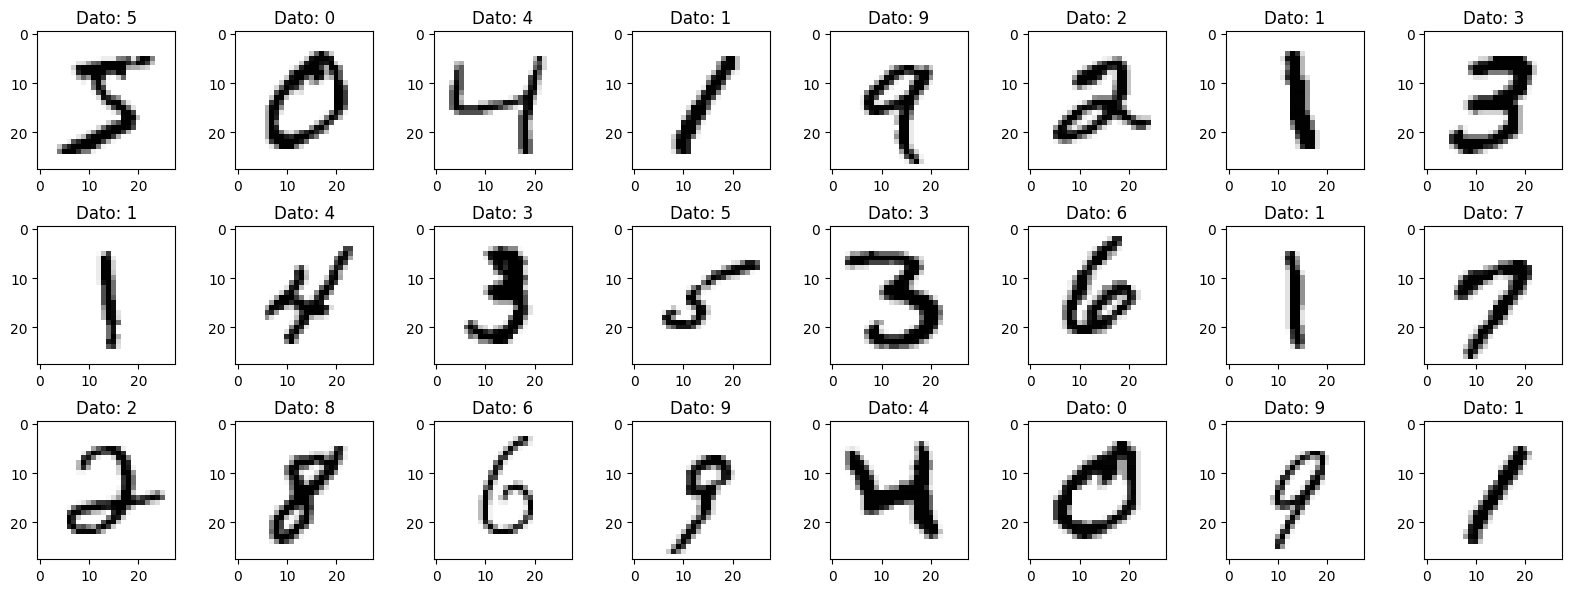

Despues del Aumento de Datos:


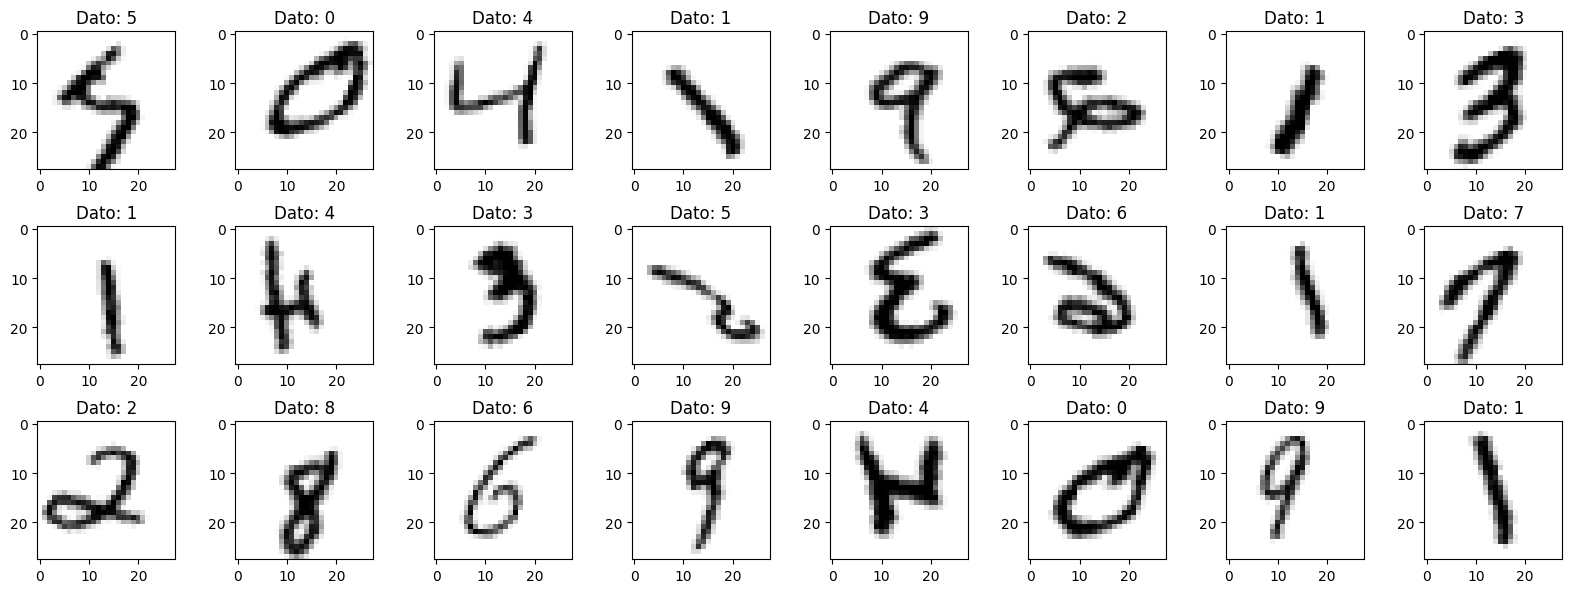

In [ ]:
n_columnas = 8
n_filas = 3
n_total = n_columnas*n_filas

fig1, axes1 = plt.subplots(ncols=n_columnas,nrows=n_filas,figsize=(2*n_columnas,2*n_filas))
print("Antes del Aumento de Datos:")
for index in range(n_total):
  val1 = axes1[index//n_columnas,index%n_columnas]
  val1.imshow(X_entrenamiento[index,:].reshape(28,28), cmap='gray_r')
  val1.set_title('Dato: {}'.format(np.argmax(Y_entrenamiento[index])))

plt.tight_layout()
plt.show()

print("Despues del Aumento de Datos:")
fig2, axes2 = plt.subplots(ncols=n_columnas,nrows=n_filas,figsize=(2*n_columnas,2*n_filas))
for X,Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=n_total,shuffle=False):
  for index in range(n_total):
    val2 = axes2[index//n_columnas,index%n_columnas]
    val2.imshow(X[index].reshape(28,28), cmap='gray_r')
    val2.set_title('Dato: {}'.format(np.argmax(Y[index])))
  break
plt.tight_layout()
plt.show()

# **Creacion del Modelo**


En esta parte agregaremos las capas necesarias, hasta lograr los resultados que deseamos, para ello es importante recordar que dependiendo de las imagenes a analizar y el objetivo de las mismas depende la configuracion de nuestra red en nuestro casos, solo necesitaremos utilizar capas de Convolucion, Max-Pooling y  una capa final de conectada totalmente con el momelo que nos arroje el resultado de la clasificion, tal y como se ve en la siguiente imagen.

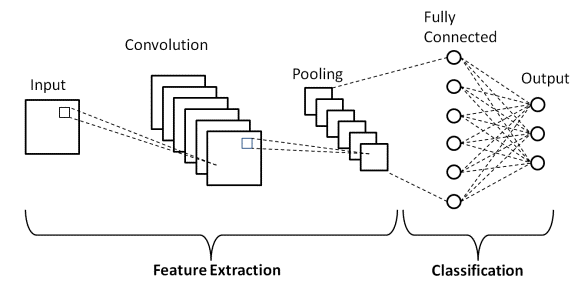

Balaji S. (2020). Binary Image classifier CNN using TensorFlow [FIGURA]. Recuperado de: https://medium.com/techiepedia/binary-image-classifier-cnn-using-tensorflow-a3f5d6746697

Ademas de esto usaremos una tecnica que lleva por nombre Dropout, la capa Dropout es una capa regularizadora comúnmente utilizada en las redes neuronales. Ayuda a evitar el sobreajuste al desactivar aleatoriamente un porcentaje de las unidades de salida de una capa durante el entrenamiento. Esto ayuda a reducir la interdependencia entre las unidades y mejora la generalización del modelo.
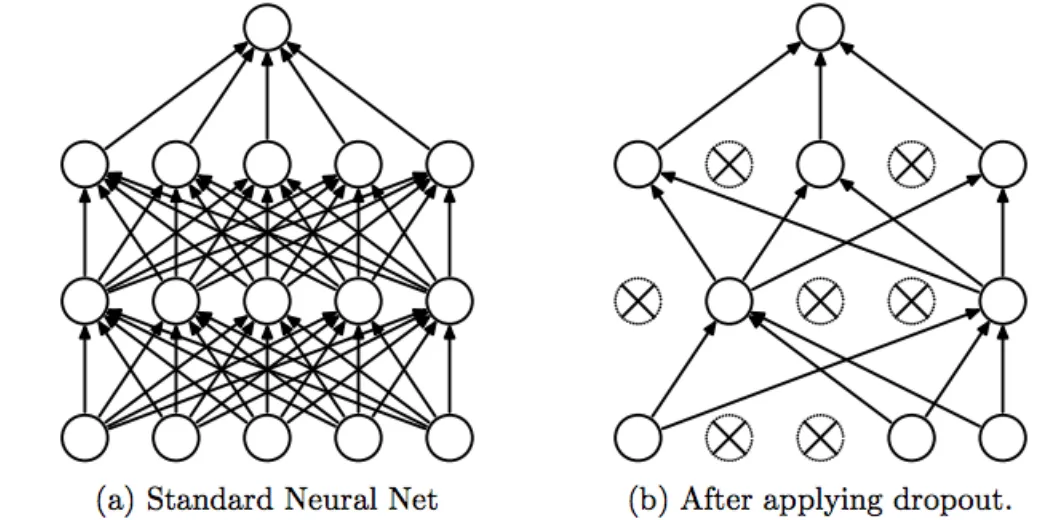

Srivastava, Nitish, et al. Dropout: una forma sencilla de evitar que las redes neuronales
sobreajuste”, JMLR 2014

In [ ]:
modelo_CNN = Sequential()

In [ ]:
#Para la primera capa deberemos ingresar los datos de las dimensiones de la imagen que recibira

modelo_CNN.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))),
modelo_CNN.add(MaxPooling2D(pool_size=(2,2))),

modelo_CNN.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')),
modelo_CNN.add(MaxPooling2D(pool_size=(2,2))),

modelo_CNN.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu')),
modelo_CNN.add(MaxPooling2D(pool_size=(2,2))),

modelo_CNN.add(Dropout(rate=0.5))

modelo_CNN.add(Flatten()),

modelo_CNN.add(Dense(100, activation='relu')),
modelo_CNN.add(Dropout(rate=0.5))
modelo_CNN.add(Dense(50, activation='relu')),
modelo_CNN.add(Dropout(rate=0.5))
modelo_CNN.add(Dense(10, activation='softmax'))

En este apartado configuraremos como se compilara nuestro modelo de red neuronal, en esta parte se nos pedira configurar:


1.   El optimizador que sera el encargado de ajustar los pesos de los modelos durante el entrenamiento.
2.   La funcion de perdida
3.   La metrica que se utilizara para la evaluacion del modelo



In [ ]:
sgd = SGD(learning_rate=0.1)
modelo_CNN.compile(optimizer="adam" ,loss='categorical_crossentropy',metrics=['accuracy'])

Aqui pasamos los datos de entrenamiento  para crear un generador de datos con la seccion de aumento de datos que se explico anteriormente

In [ ]:
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size = 32)

Configuramos el numero de epocas y el tamaño del lote de datos que usaremos de muestrs que se utilizaran par actualizar los pesos de los modelos en cada interacion. Una vez hecho esto procedemos a entrenar el modelo

In [ ]:
numero_epocas = 150
tam_lote = 32
print("ENTRENANDO MODELO, POR FAVOR ESPERE ALGUNOS MINUTOS......")
history = modelo_CNN.fit(data_gen_entrenamiento,
                         epochs=numero_epocas,
                         batch_size=tam_lote,validation_data=(X_pruebas,Y_pruebas),
                         steps_per_epoch=int(np.ceil(60000 / float(tam_lote))),
                         validation_steps=int(np.ceil(10000 / float(tam_lote))))

print("MODELO ENTRENADO")

ENTRENANDO MODELO, POR FAVOR ESPERE ALGUNOS MINUTOS......
Epoch 1/150
1875/1875 [==============================] - 31s 15ms/step - loss: 1.5225 - accuracy: 0.4569 - val_loss: 0.4825 - val_accuracy: 0.8282
Epoch 2/150
1875/1875 [==============================] - 29s 16ms/step - loss: 0.9386 - accuracy: 0.7006 - val_loss: 0.3426 - val_accuracy: 0.8794
Epoch 3/150
1875/1875 [==============================] - 29s 15ms/step - loss: 0.7715 - accuracy: 0.7701 - val_loss: 0.2870 - val_accuracy: 0.9191
Epoch 4/150
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6728 - accuracy: 0.8051 - val_loss: 0.2285 - val_accuracy: 0.9334
Epoch 5/150
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6279 - accuracy: 0.8216 - val_loss: 0.1757 - val_accuracy: 0.9455
Epoch 6/150
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5950 - accuracy: 0.8335 - val_loss: 0.1983 - val_accuracy: 0.9403
Epoch 7/150
1875/1875 [==============================] - 29s

Aqui veremos los resultados que ha obtenido el modelo una vez entrenado y realizado las prediccionas con las que se evaluaria, podemos apreciar que el modelo tiene una exactitud del 95%

313/313 [==============================] - 1s 3ms/step - loss: 0.1260 - accuracy: 0.9645


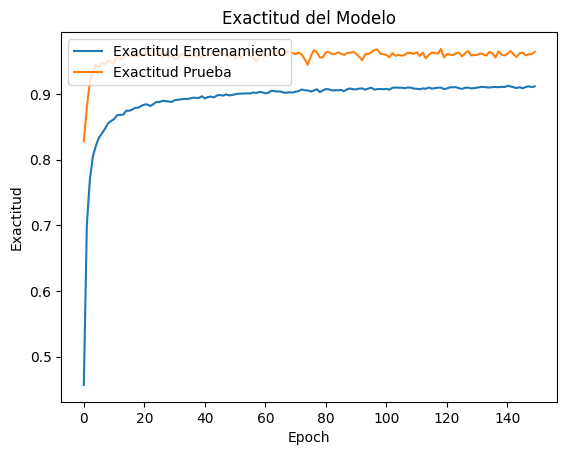

In [ ]:
modelo_CNN.evaluate(X_pruebas, Y_pruebas)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del Modelo')
plt.ylabel('Exactitud')
plt.xlabel('Epoch')
plt.legend(['Exactitud Entrenamiento', 'Exactitud Prueba'], loc='upper left')
plt.show()

En este apartado, imprimiremos la matriz de confusion para conocer que tantos datos han sido clasificados de manera correcta y cuantos de manera erronea

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[[ 944    0    0    0    2    0    6    0    0    0]
 [   0 1125    0    0    0    0    2    2    0    0]
 [   8    3  952    2    1   28   27   12    3    3]
 [   1    0   10  996    0    8    2    0   11    7]
 [   3    1    0    0  957    0    1    2    2    4]
 [   2    2   30    6    1  835   10    4    1    2]
 [   6    1   11    0    1    4  906    0    0    0]
 [   6    3   25    3    6   16    0 1008    1   11]
 [   1    0    4    2    6    0    3    0  952   12]
 [   9    0    0    1    8    1    1    0    4  970]]


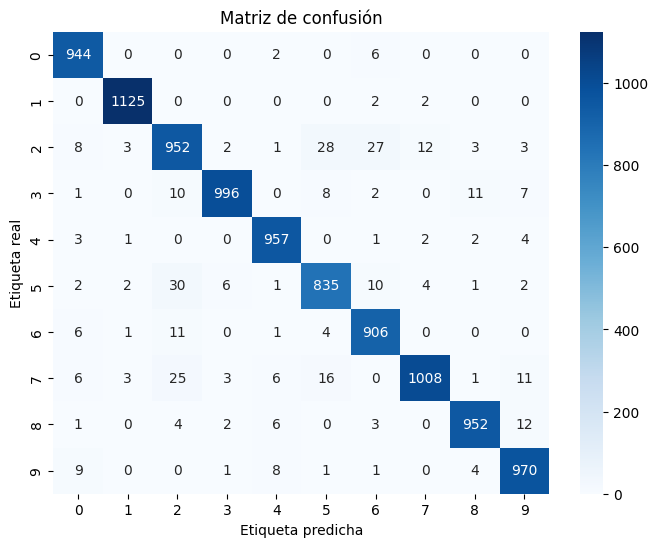

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = modelo_CNN.predict(X_pruebas)
y_ref = np.argmax(y_pred, axis=1)
xcpruebas = np.argmax(Y_pruebas, axis=1)


print(y_ref)
print(xcpruebas)
matriz_conf = confusion_matrix(y_ref,xcpruebas)
print(matriz_conf)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()

Finalmente, importamos el modelo con tensorflow.js para poder usarlo en nuestro sitio web

In [ ]:
modelo_CNN.save('numeros_conv_ad_do.h5')

#Convertirlo a tensorflow.js
!pip install tensorflowjs
!mkdir carpeta_salida
!tensorflowjs_converter --input_format keras numeros_conv_ad_do.h5 carpeta_salida

mkdir: cannot create directory ‘carpeta_salida’: File exists
2023-07-13 00:51:58.726096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
